In [10]:
#### LIBRARIES AND FUNCTIONS
using DataFrames
using CSV
using JLD2
using Plots
using StatsBase
using LaTeXStrings


In [11]:
n_sim = 1:32; 
T = 700

700

In [12]:
########## Get energy statistics #######
path = "./data_new/data1/Data.jld2"
X = JLD2.load(path)
parameters = X["parameters"]
N,p,tmin,tmax,Δt,t,L,θ,σ,it_network,it_brownian, r, p_WS = parameters 

θs = zeros(length(n_sim)) 
Energy = zeros(length(n_sim)) 
Energy_Min = zeros(length(n_sim))
Energy_Max = zeros(length(n_sim))
N_network = zeros(length(n_sim))

for index in n_sim    
    path = "./data_new/data"*string(index)*"/Data.jld2"#"./data/"*str*"/data"*string(index)*"/Data.jld2"
    try 
        X = JLD2.load(path)
        e = X["Energy"]
        parameters = X["parameters"]
        N,p,tmin,tmax,Δt,t,L,θ,σ,it_network,it_brownian, r, p_WS = parameters 
            
        e_asymp = e[:, t .>= T ] 

        Energy[index]     = mean( mean(e_asymp,dims=1)[:] )
        
        Energy_Min[index] = mean( minimum(e_asymp,dims=2)[:] )
        Energy_Max[index] = mean( maximum(e_asymp,dims=2)[:])
        N_network[index] += 1
        θs[index] = θ
            
    catch
        println(path*" does not exist")
    end
end

In [16]:
#### Get the order parameter statistics 
X = JLD2.load(path)
parameters = X["parameters"]
N,p,tmin,tmax,Δt,t,L,θ,σ,it_network,it_brownian, r, p_WS = parameters 
n_harm = size(X["order_parameter"][1])[1]


OP_mean = zeros(n_harm , length(n_sim))
OP_min  = zeros(n_harm , length(n_sim))
OP_max  = zeros(n_harm , length(n_sim))

for index in n_sim
    path = "./data_new/data"*string(index)*"/Data.jld2"
    X = JLD2.load(path)
    try
        R_mean = zeros(n_harm)
        R_min = zeros(n_harm)
        R_max = zeros(n_harm)
    
        tot = it_brownian * it_network
        for iteration in 1:tot
            r_asymp = X["order_parameter"][iteration][:,t.>T]
            R_mean .+=  mean(    r_asymp , dims = 2)[:] ./ tot
            R_min  .+=  minimum( r_asymp , dims = 2)[:] ./ tot
            R_max  .+=  maximum( r_asymp , dims = 2)[:] ./ tot
        end

        OP_mean[:,index] = R_mean
        OP_max[:,index]  = R_max
        OP_min[:,index]  = R_min
    catch
        println(path*" does not exist")
    end    
end

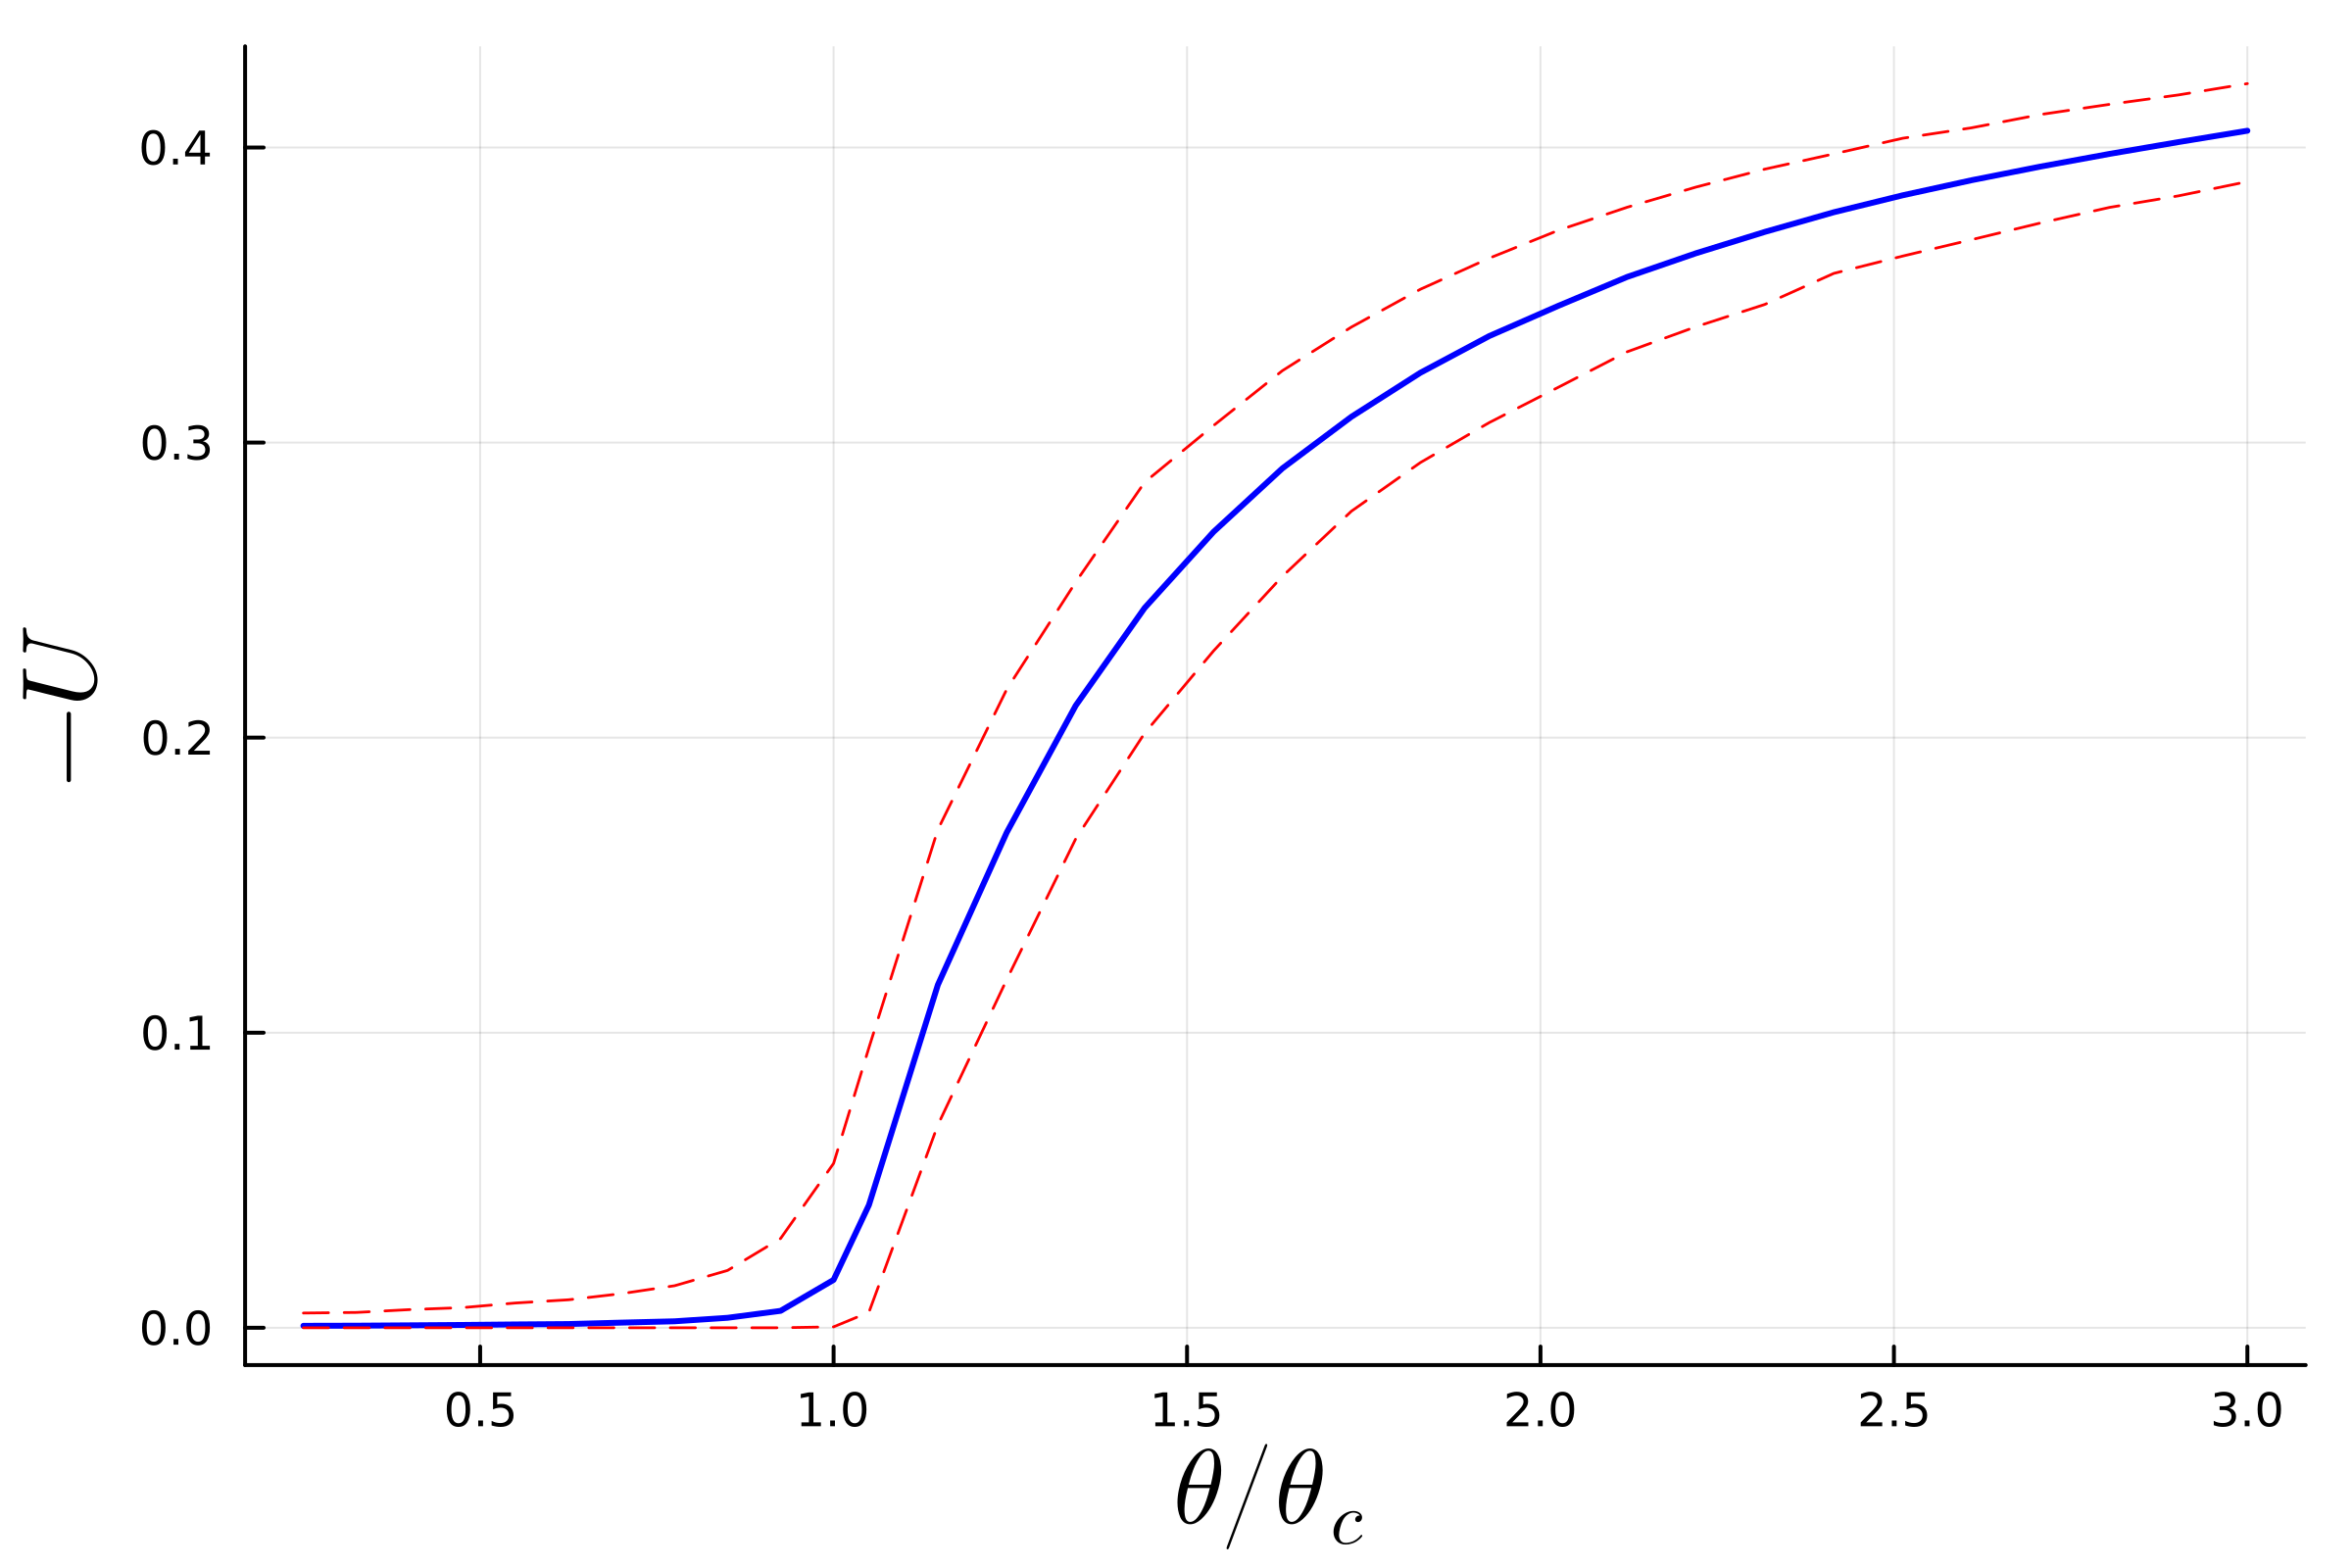

In [17]:
θs_ren = θs./(σ^2/p)
plot(θs_ren,-Energy,color=:blue,linewidth=1.5,label="",dpi=400)
plot!(θs_ren,-Energy_Min,color=:red,linestyle=:dash,linewidth=0.7,label="")
plot!(θs_ren,-Energy_Max,color=:red,linestyle=:dash,linewidth=0.7,label="")
xlabel!(L"\theta/\theta_c",xguidefontsize=18)
ylabel!(L"-U",yguidefontsize=18)
#savefig("Kuramoto_ER.png")

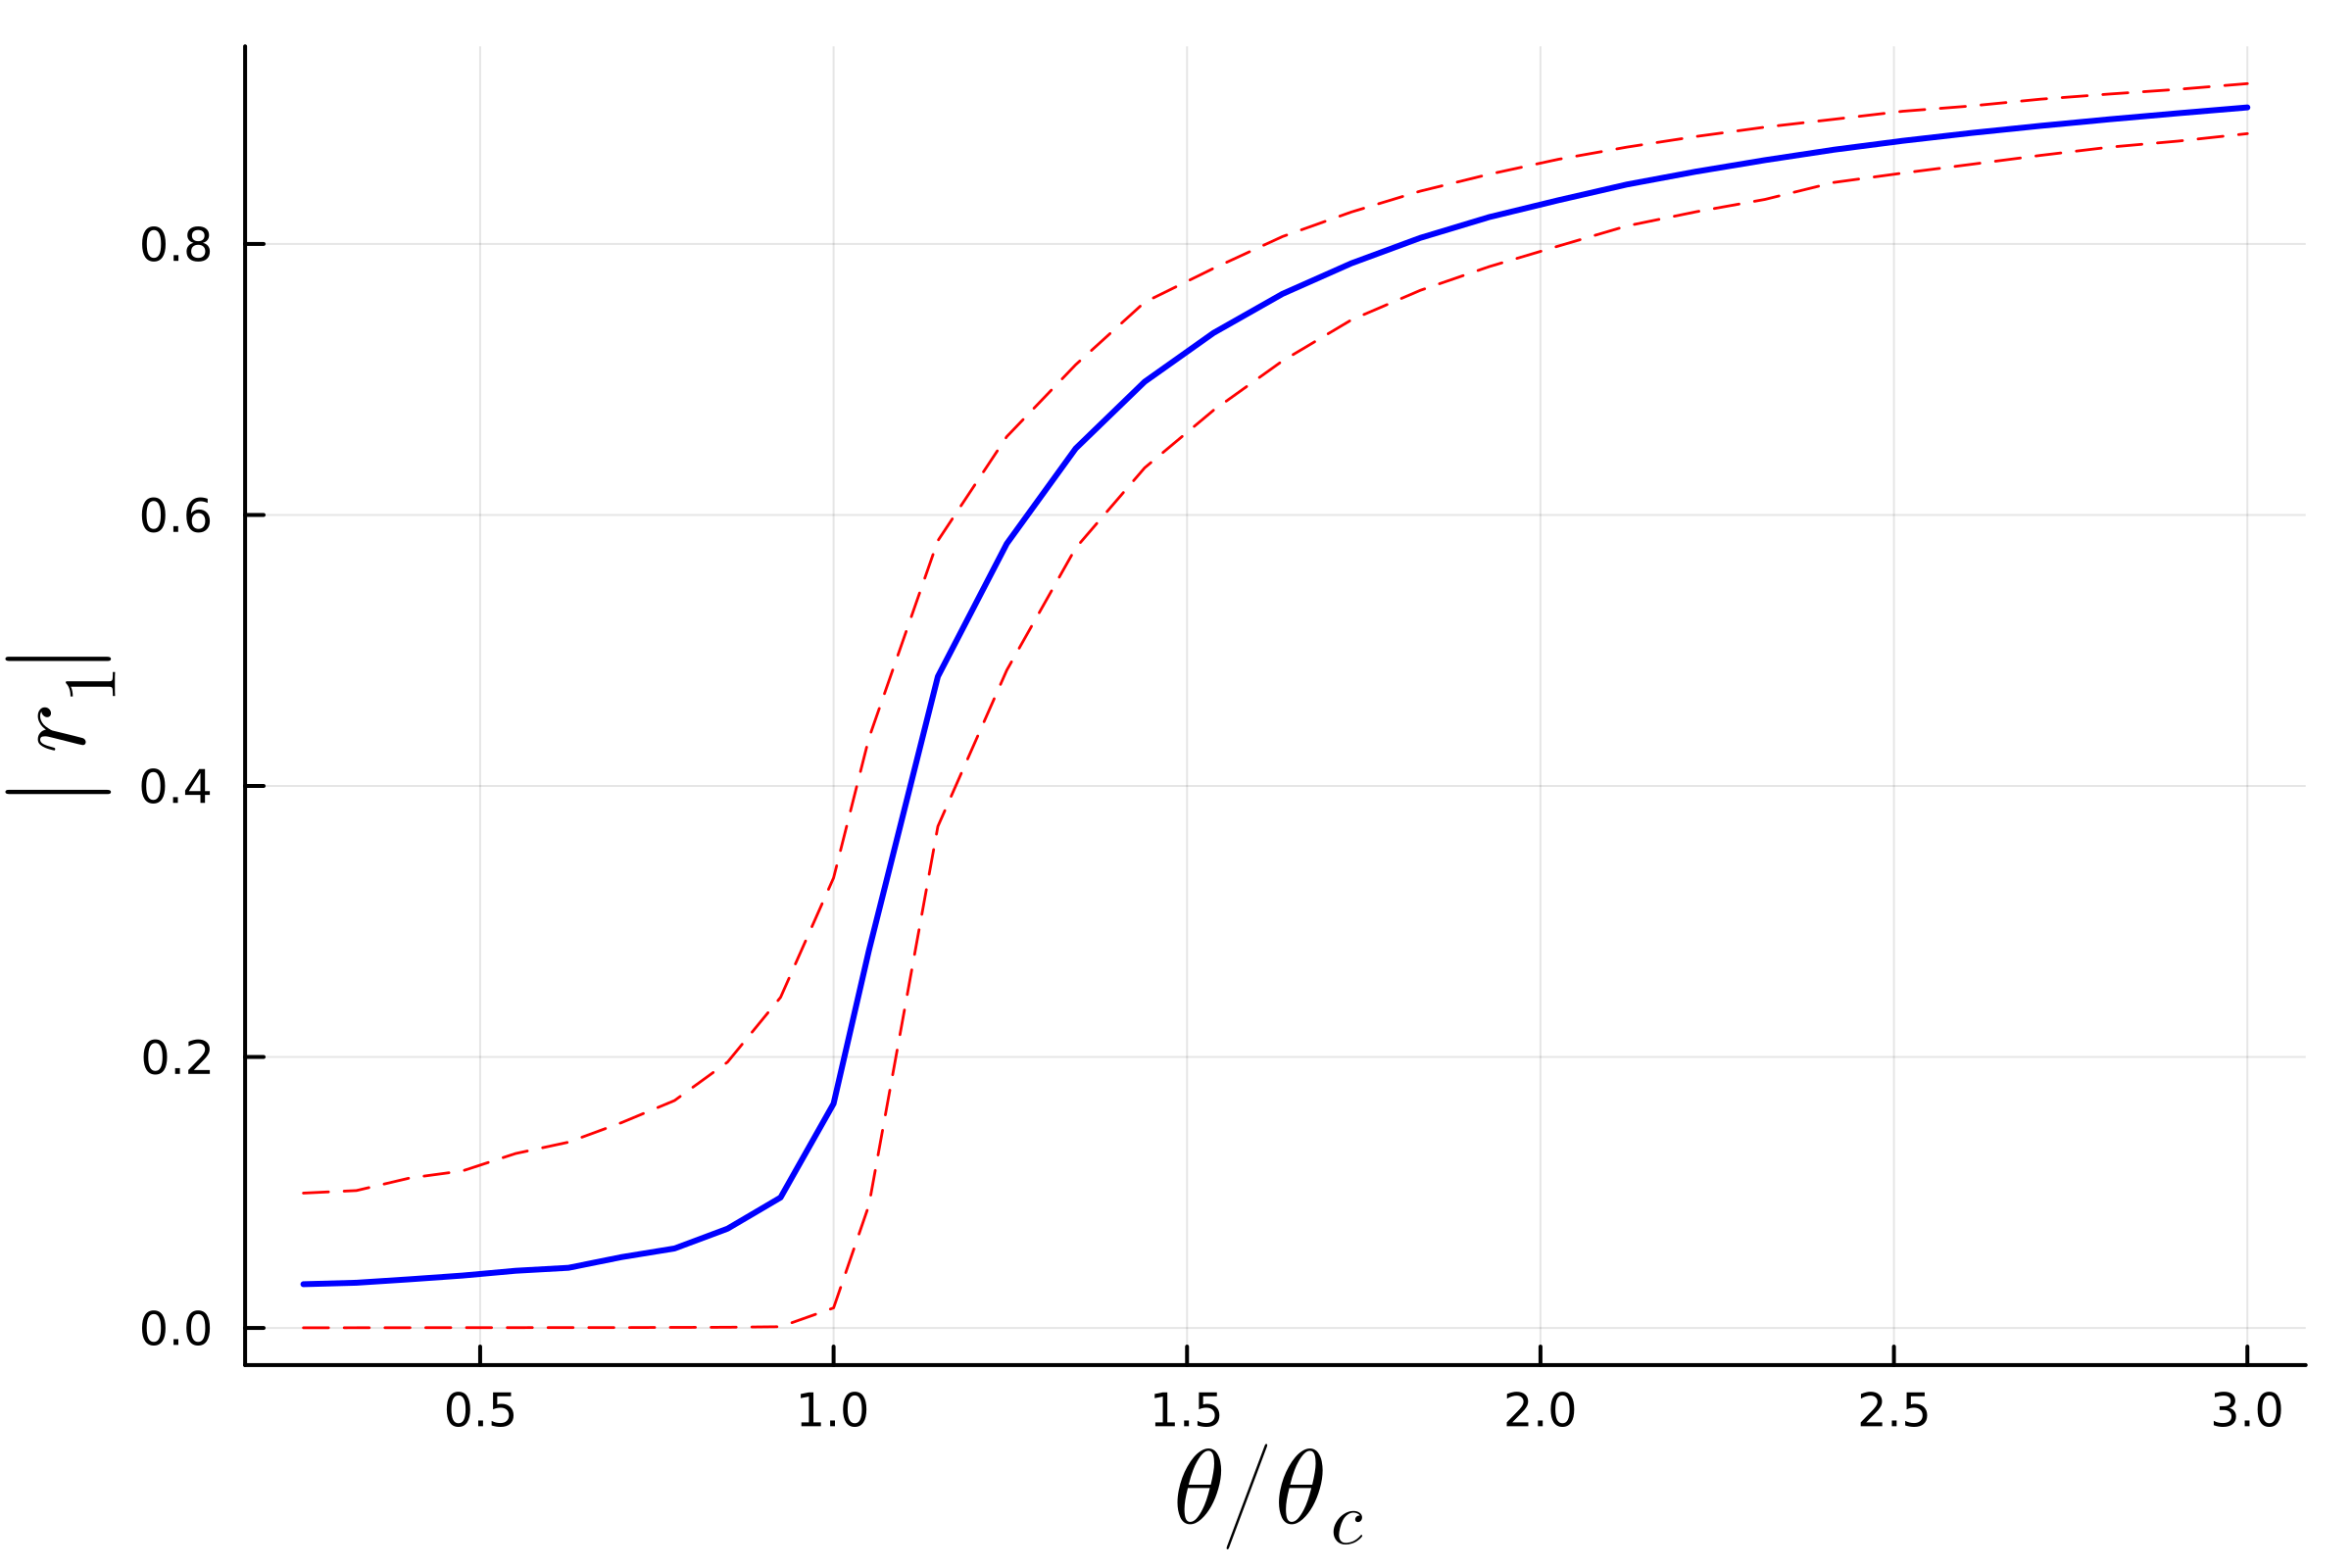

In [23]:
N_harmonic = 1
x = OP_mean[N_harmonic,:]
x_min = OP_min[N_harmonic,:]
x_max = OP_max[N_harmonic,:]
plot(θs_ren,x,color=:blue,linewidth=1.5,label="",dpi=400)
plot!(θs_ren,x_min,color=:red,linestyle=:dash,linewidth=0.7,label="")
plot!(θs_ren,x_max,color=:red,linestyle=:dash,linewidth=0.7,label="")
xlabel!(L"\theta/\theta_c",xguidefontsize=18)
ylabel!(L"|r_1|",yguidefontsize=18)

In [ ]:
# N = 1000
# r = 20

# h = r / N

# σ = 0.1
# β = 2/ σ^2

# θc = 1/(β*h)

In [ ]:
########## Get energy statistics #######
# path = "./data_new/data1/Data.jld2" #"./data_new/FirstBatch/data1/Data.jld2"
# X = JLD2.load(path)
# parameters = X["parameters"]
# N,p,tmin,tmax,Δt,t,L,θ,σ,it_network,it_brownian, r, p_WS = parameters 

# θs = zeros(length(n_sim)) 
# Energy = zeros(length(n_sim)) 
# Energy_Min = zeros(length(n_sim))
# Energy_Max = zeros(length(n_sim))
# N_network = zeros(length(n_sim))

# for index in n_sim
#     Energy_batch = zeros(length(t[t.>=T]))
#     Energy_Min_batch = 0
#     Energy_Max_batch = 0
#     l_tot = 0
#     for (index_str,str) in enumerate(batches)
#         path = "./data_new/data"*string(index)*"/Data.jld2"# "./data_new/"*str*"/data"*string(index)*"/Data.jld2"#"./data/"*str*"/data"*string(index)*"/Data.jld2"
#         try 
#             X = JLD2.load(path)
#             e = X["Energy"]
#             parameters = X["parameters"]
#             N,p,tmin,tmax,Δt,t,L,θ,σ,it_network,it_brownian, r, p_WS = parameters 
            
#             e_asymp = e[:, t .>= T ] 
#             Energy_batch .+= mean(e_asymp,dims=1)[:]
#             Energy_Min_batch += mean( minimum(e_asymp,dims=2) , dims=1)[1]
#             Energy_Max_batch += mean( maximum(e_asymp,dims=2) , dims=1)[1]
#             l_tot += 1
#             θs[index] = θ
            
#         catch
#             println(path*" does not exist")
#         end
#     end
#     #OrdPar_batch ./= l_tot
#     Energy[index] = mean(Energy_batch ./ l_tot)
#     Energy_Min[index] = Energy_Min_batch ./ l_tot
#     Energy_Max[index] = Energy_Max_batch ./ l_tot
#     N_network[index] = l_tot
# end